# NAPOVEDOVANJE USPEHA STARTUP - OV


## UVOD
Ustanovitev podjetja je tvegan podvig, stopnja uspešnosti startup-ov pa je pogosto nizka. Po podatkih Uprave za mala podjetja približno 50 % malih podjetij propade v prvih petih letih. Ta velik procent propadov je mogoče pripisati različnim dejavnikom, vključno z neustreznimi tržnimi raziskavami, pomanjkanjem kapitala in slabemu vodenju.

V projektu bom uporabil tehnike strojnega učenja za napovedovanje stopnje uspešnosti startupov v ZDA. Z analizo podatkov o startup-ih in njihovih rezultatih bom poskusil prepoznati vzorce in trende, ki jih je mogoče uporabiti za natančnejše napovedi o verjetnosti uspeha novih podjetij. Te informacije so lahko dragocene za  podjetnike, ki želijo oceniti izvedljivost svojih poslovnih idej, pa tudi za vlagatelje, ki želijo sprejemati informirane odločitve o tem, kam bodo vlagali.

Za analizo podatkov in napovedovanje bomo uporabili različne algoritme in tehnike strojnega učenja. Tukaj bom uporabil Random Forest Classifier. Cilj je zgraditi model, ki je sposoben napovedati stopnjo uspešnosti startup-ov na podlagi različnih dejavnikov, kot so panoga, v kateri startup deluje, lokacija podjetja, izkušnje ustanoviteljev, povezave z drugimi podjetji in kakšno je njihovo začetno financiranje. 

## OPIS SPREMENLJIVK


*   *State Code* - Unikatna koda za vsako zavezno državo v ZDA (številsko)
*  *City* - Mesto, kjer se nahaja podjetje (kategorično)
*   *Zip Code* - Poštna številka mesta (številsko)
*   *Name* - Ime podjetja (kategorično)
*   *Age* - Koliko je staro podjetje
*   *First Funding at* - Kdaj je potekalo prvo financiranje podjetja (številsko)
*   *Last Funding at* - Kdaj je potekalo zadnje financiranje podjetja (številsko)
*   *Age Of First Funding Year* - Koliko let je preteklo odkar je bilo prvic financirano (številsko)
*   *Age Of Last Funding Year* - Koliko let je preteklo odkar je bilo zadnjic financirano (številsko)
*   *Age Of First Milestone Year* - Koliko let je preteklo odkar je podjetje doseglo prvi mejnik (številsko)
*   *Age Of Last Milestone Year* - Koliko let je preteklo odkar je podjetje doseglo zadnji mejnik (številsko)
*   *Relationships* - Število povezav z ostalimi podjetji (številsko)
*   *Funding Rounds* - Število krogov v katerih je podjetje zbiralo denar  (številsko)
*   *Funding Total USD* - Celotna količina zbranega denarja (številsko) 
*   *Milestones* - Število mejnikov, ki jih je podjetje doseglo (številsko)
*   *Category* - Kategorija sektorja gospodarstva kjer podjetje nastopa (kategorično)
*   *has_VC* - Če ima tveganega kapitalista, ki vlaga v podjetje (številsko)
*   *has_Angel* - Če ima podjetje posameznika z veliko denarja in znanja, ki vlaga v podjetje 
*   *has_roundA* - Če je podjetje imelo prvo stopnjo financiranja (angl. Round A) (številsko)
*   *has_roundB* - Če je podjetje imelo drugo stopnjo financiranja (angl. Round B) (številsko)
*   *has_roundC* - Če je podjetje imelo tretjo stopnjo financiranja (angl. Round C) (številsko)
*   *has_roundD* - Če je podjetje imelo četrto stopnjo financiranja (angl. Round D) (številsko)
*   *Average Participants* - Povprčno število investitorjev,ki je sodelovalo pri financiranju (številsko)
*   *is_acquired* - Pove, če je bilo podjetje kupljeno ali zje propadlo (kategorično: 'accuired' - kupljeno, 'closed' - propadlo)










In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('/content/reformated_startup.csv', sep=',', decimal='.')

df.head()

,state_code,zip_code,city,name,is_acquired_numerical,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_acquired
0,CA,92101,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,...,0,1,0,1,0,0,0,0,1.0000,acquired
1,CA,95032,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,...,0,0,1,0,0,1,1,1,4.7500,acquired
2,CA,92121,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,...,0,0,0,0,1,0,0,0,4.0000,acquired
3,CA,95014,Cupertino,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,...,0,0,0,0,0,1,1,1,3.3333,acquired
4,CA,94105,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,...,0,0,1,1,0,0,0,0,1.0000,closed


##PREDPROCESIRANJE PODATKOV

In [ ]:
df.isnull().sum()

state_code                    0
zip_code                      0
city                          0
name                          0
is_acquired_numerical         0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roun

Da se znebimo datumov vpeljemo novo spremenljivko *company_age*, ki pove kako staro je podjetje, računa se na naslednji način: 


1.  Pretvorimo datum kdaj se je podjetje odprlo in zaprlo v pravilno format
2.  Zapolnimo prazne vrednosti kjer je podjetje še odprto z današnjim datumom
3.  Odštejemo datum zaprtja/danšnji, da dobimo podatek o tem kako dolgo je podjetje obstajalo/obstaja








In [18]:
#Prvo zapolnimo še ostalo manjkajoče vrednosti
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)

df['closed_at'] = df['closed_at'].fillna('2013-12-31')

df['closed_at'] = pd.to_datetime(df['closed_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])

df["company_age"] = (df["closed_at"]-df["founded_at"])
df["company_age"] = round(df.company_age/np.timedelta64(1,'Y'))

#Pobrišemo še zdaj nepomembne podatke
df.drop(['closed_at', 'founded_at'], inplace=True, axis=1)

In [19]:
#Pobiršemo negativne vrednosti/anmomalije
df=df.drop(df[df.company_age<0].index)
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

##ANALIZA PODATKOV 

Pred strojnim učenjem bom analiziral določene podatke v zbirki podatkov, ki se mi se zdijo dobri pokazatelji ali bo podjetje obstalo. Analiziral bom naslednje podatke:


*   Kakšen vpliv ima starost podjetja na možnost uspeha
*   Kakšen vpliv ima število mejnikov, ki jih je podjetje doseglo na možnost uspeha 
*   Kakšen vpliv ima število vez z različnimi pomembnimi akterji, ki jih ima podjetje na možnost uspeha




####PRIKAZ ŠTEVILA USPELIH PODJETIJ

Text(0.5, 1.0, 'Ali je bilo podjetje uspešno?')

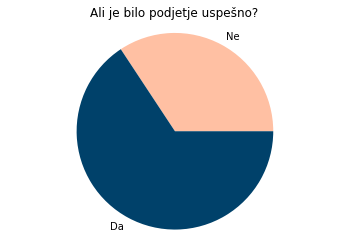

In [ ]:
pie_chart_data = df["is_acquired_numerical"].value_counts().to_dict()

fig, ax = plt.subplots()
ax.pie(x=[pie_chart_data[False], pie_chart_data[True]], labels=['Ne', 'Da'], 
           colors=['#ffc0a3', '#00416a'], textprops={'color': '#040204'})

ax.axis('equal')
ax.set_title('Ali je bilo podjetje uspešno?')

####VPLIV STAROSTI PODJETJA

In [ ]:
#Preštejemo koliko je vseh podjetij, ki je uspelo po starostnih skupinah
graf_data_age = df[df['is_acquired']=='acquired'].groupby(['company_age']).agg({'is_acquired':'count'}).reset_index()
graf_data_age.columns = ['company_age','Total Succeded']

#Preštejemo koliko je vseh podjetij po starostnih skupinah
temp_graph_data=df.groupby(['company_age']).agg({'is_acquired':'count'}).reset_index()
temp_graph_data.columns = ['company_age', 'Total']

#Podatke združimo
graf_data_age=graf_data_age.merge(temp_graph_data, on='company_age')

#Izračunamo procentualno možnost uspeha podjetja                         
graf_data_age['Succes Rate'] = round((graf_data_age['Total Succeded']/graf_data_age['Total']) * 100)

graf_data_age

,company_age,Total Succeded,Total,Succes Rate
0,2.0,8,38,21.0
1,3.0,16,53,30.0
2,4.0,36,68,53.0
3,5.0,51,83,61.0
4,6.0,58,82,71.0
5,7.0,54,85,64.0
6,8.0,56,73,77.0
7,9.0,66,85,78.0
8,10.0,41,53,77.0
9,11.0,43,52,83.0


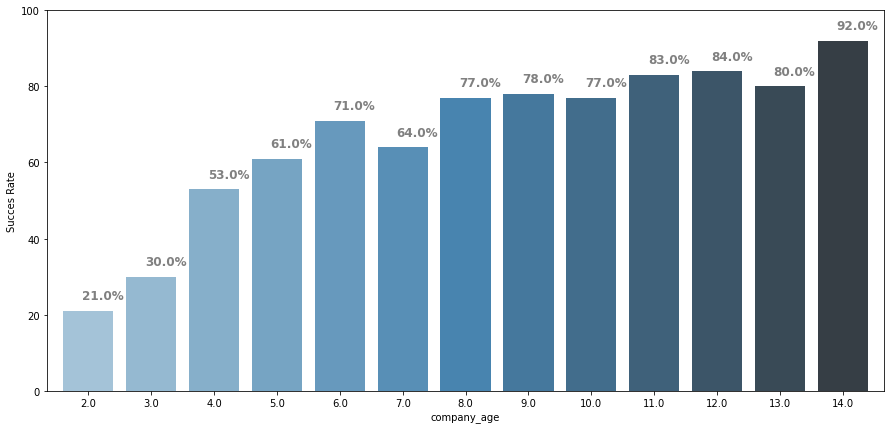

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='company_age',y='Succes Rate', data=graf_data_age, ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13))

x = np.arange(len(graf_data_age))
y = graf_data_age['Succes Rate']

for index, value in enumerate(y):
    ax.text(x[index]- 0.1, value+3, str(value)+'%', fontsize = 12, color='gray', fontweight='bold')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.tight_layout
plt.margins(0.02, 0.0)

Iz grafa je razvidno, da se ko podjetja dosežejo mejnik štirih let obstoja njihove možnosti za uspeh zelo povečajo. Po četrtem letu možnosti za uspeh podjetja enakomerno rastejo in se stabilizirajo. Za investitorje je lahko to dober pokazatelj če podjetje obstane več kot štiri leta, se možnosti, da bi izgubili denar dosti zmanjšajo.   

####VPLIV ŠTEVILA MEJNIKOV PODJETJA

In [ ]:
#Preštejemo koliko je vseh podjetij, ki je uspelo po število doseženih mejnikov
graf_data_milestones = df[df['is_acquired']=='acquired'].groupby(['milestones']).agg({'is_acquired':'count'}).reset_index()
graf_data_milestones.columns = ['milestones','Total Succeded']

#Preštejemo koliko je vseh podjetij po število doseženih mejnikov
temp_graph_data_2 = df.groupby(['milestones']).agg({'is_acquired':'count'}).reset_index()
temp_graph_data_2.columns = ['milestones','Total']

#Podatke združimo
graf_data_milestones = graf_data_milestones.merge(temp_graph_data_2, on='milestones')
                           
#Izračunamo procentualno možnost uspeha podjeta za vsak dosežen mejnik
graf_data_milestones['Succes Rate'] = round((graf_data_milestones['Total Succeded']/graf_data_milestones['Total']) * 100)

graf_data_milestones

,milestones,Total Succeded,Total,Succes Rate
0,0,46,143,32.0
1,1,140,230,61.0
2,2,160,217,74.0
3,3,135,164,82.0
4,4,43,54,80.0
5,5,22,24,92.0
6,6,3,4,75.0
7,8,1,1,100.0


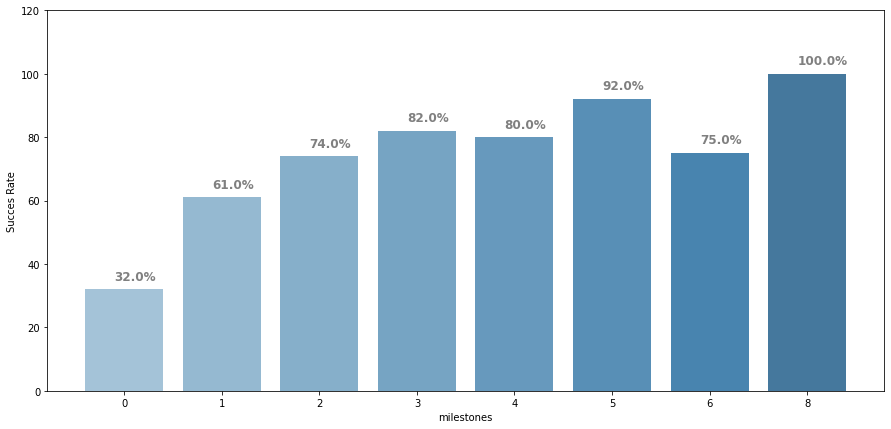

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='Succes Rate',data=graf_data_milestones,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13))

x = np.arange(len(graf_data_milestones))
y = graf_data_milestones['Succes Rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')

ax.set_ylim(0,120)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout
plt.margins(0.05, 0.0)

Iz grafa je razvidno, da se po prvem doseženem mejniku možnosti za uspeh podjetja zelo povečjano, nakar enakomerno rastejo in se stabilizirajo okoli 80% - 90%. Če podjetje uspešno doseže prvi mejnik je lahko to dober pokazatelj za investitorje, da je na pravi poti. 

####VPLIV ŠTEVILA VEZ PODJETJA

In [ ]:
temp_df = df.copy()

#Dodamo stolpec z razponom števila vez za lažji prikaz analize podatkov
temp_df['Relationships Range'] = temp_df['relationships'].apply(lambda x : '0' if x == 0 else '>10' if x > 10 else '1-10')

#Izračunamo število podjetji za vsako skupino 
initial_graph_data_relationships = temp_df.groupby(['Relationships Range', 'is_acquired_numerical']).agg({'name' : 'count'}).reset_index()

#Podatke razdelimo v tabelo
graph_data_relationships = pd.pivot_table(initial_graph_data_relationships,
                          index=['Relationships Range'],
                          columns=['is_acquired_numerical'],
                          values=['name']).reset_index()

#Dodamo stolpce za lepši izpis  
graph_data_relationships.columns = ['Relationships Range', 'Closed', 'Acquired']

#Izračunamo celotno število podjetih za vsako skupino 
graph_data_relationships['Total Companies'] = graph_data_relationships['Closed'] + graph_data_relationships['Acquired']

##Izračunamo procentualno možnost uspeha podjetja za vsako skupino 
graph_data_relationships['Success Rate'] = round(graph_data_relationships['Acquired'] / graph_data_relationships['Total Companies'] * 100)

graph_data_relationships

,Relationships Range,Closed,Acquired,Total Companies,Success Rate
0,0,33,3,36,8.0
1,1-10,233,371,604,61.0
2,>10,21,176,197,89.0


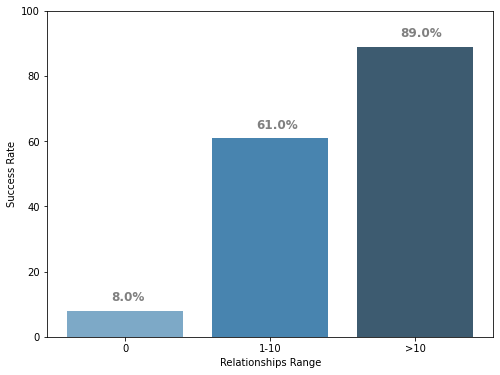

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x = 'Relationships Range', y = 'Success Rate',data=graph_data_relationships,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=3))

x = np.arange(len(graph_data_relationships['Relationships Range']))
y = graph_data_relationships['Success Rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')

ax.set_ylim(0,100)
  
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.margins(0.05, 0.1)

Iz grafa je razvidno, da podjetja, ki nimajo nobenih vez zelo težko uspejo. Pokaže se pa, da lahko 1-10 vez, že čisto zdravo število kjer so možnosti za uspeh že relativno visoke. 

##STROJNO UČENJE

V tem delu bom nad izbrano zbirko podatkov uporabil Random Forest Classifier model strojega učenja, s katerim bomo lahko napovedali kateri startup-i bodo uspeli in analiziral pridboljene podatke. Pred tem pa je potrebno še podatke standardizirati za bolj realne rezultate in pretvoriti kategorične vrednosti v številske. 

####STANDARDIZACIJA PODATKOV IN PRETVORBA KATGORIČNIH VREDNOSTI V NUMERIČNE 

In [20]:
#Določimo stolpce, ki je potrebno standardizirati
columns_to_standardize = ['relationships', 'funding_total_usd', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']

#Standardiziranje
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [21]:
#Funkcija za pretvorbo kategoričnih vrednosti v številske
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

#Pretvorba kategorčnih vrednosti v številske
df_encoded = Encoder(df.drop(['is_acquired_numerical', 'is_acquired'], axis=1)) 

####ANALIZA IZBIRE NAJPRIMERNEJŠEGA MODELA ZA IZVAJANJE STROJNEGA UČENJA

V tem delu bom s pomočjo orodij, ki jih ponuja knjižnica pandas identificiral najprimernejši model strojenga učenja za ta projekt.

In [22]:
columns = ['state_code', 'zip_code', 'city', 'name',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants',
       'company_age']

df_izhod = df['is_acquired_numerical']
df_vhod = df_encoded[columns]

klasifikatorji = [KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), GaussianNB(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()] 

rezultati = []

for klasifikator in klasifikatorji:
    kfold = StratifiedKFold(n_splits=8, random_state=789, shuffle=True)
    cv_rezultati = cross_val_score(klasifikator, 
                                   df_vhod,
                                   df_izhod,
                                   cv=kfold, 
                                   scoring='accuracy'
                                  ) 
    rezultati.append(round(cv_rezultati.mean(), 3))
    print(f'{type(klasifikator).__name__ : >30}: {cv_rezultati.mean():1.4f}')

          KNeighborsClassifier: 0.6189
        RandomForestClassifier: 0.8161
        DecisionTreeClassifier: 0.7552
                    GaussianNB: 0.6392
          ExtraTreesClassifier: 0.8066
    GradientBoostingClassifier: 0.8543
            AdaBoostClassifier: 0.8388


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

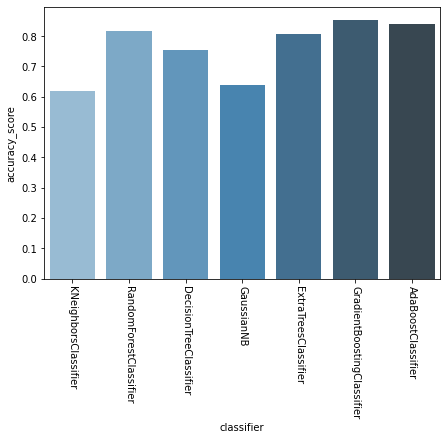

In [26]:
data = {
    "classifier": ['KNeighborsClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier'],
    "accuracy_score": rezultati,
}

tempDf = pd.DataFrame(data)

sns.barplot(x='classifier', 
            y='accuracy_score', 
            data=tempDf, 
            palette='Blues_d')
plt.xticks(rotation=-90)

Rezultati nam pokažejo, da je najboljša izbira za moj projekt klasifikator Gradient Boosting Classifier, katerega bom tudi uporabil za strojno učenje.

####DELJENJE NA UČNO IN TESTNO MNOŽICO IN UČENJE MODELA

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(df_encoded[columns], df['is_acquired_numerical'], test_size=0.25, random_state=123)

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Confusion matrix:



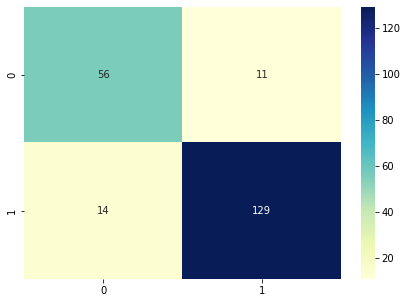


-----------------------------------------------------

Accuracy score: 0.881

-----------------------------------------------------

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        67
           1       0.92      0.90      0.91       143

    accuracy                           0.88       210
   macro avg       0.86      0.87      0.86       210
weighted avg       0.88      0.88      0.88       210

-----------------------------------------------------

ROC-AUC score: 0.869


In [16]:
print('Confusion matrix:\n') 
matrix = metrics.confusion_matrix(predictions, y_test)
plt.rcParams['figure.figsize'] = (7.1,5)
sns.heatmap(matrix, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\n-----------------------------------------------------")
print('\nAccuracy score:', round(metrics.accuracy_score(predictions, y_test), 4))
print("\n-----------------------------------------------------")
print('\nClassification report:\n')
print(metrics.classification_report(predictions, y_test)) 
print("-----------------------------------------------------")
print('\nROC-AUC score:', round(metrics.roc_auc_score(predictions, y_test),4))

Iz rezultatov lahko vidimo, da model Gradient Boosting Clasiffier napove uspešnost startup-a 88% natančno, kar bi lahko bilo lahko vlagateljem dodatna informacija k vprašanju ali je smiselno vložiti denar. 

##ZAKLJUČEK
Z analizo podatkov o startupih in njihovih rezultatih sem lahko prepoznal vzorce in trende, ki jih je mogoče uporabiti za natančnejše napovedi uspeha novih podjetij. S pomočjo uporabe Gradient Boosting Clasiffier-ja, mi je uspelo zgraditi model, ki lahko napove uspeh startupov na podlagi različnih dejavnikov, kot so industrija, lokacija, izkušnje ustanovitelja, partnerstva in začetno financiranje. Rezultati tega projekta so lahko dragoceni za podjetnike, ki želijo oceniti izvedljivost svojih poslovnih idej, in za vlagatelje, ki želijo sprejemati težke investicijske odločitve. Upam, da bo model služil kot uporabno orodje za tiste, ki želijo navigirati v pogosto tveganem svetu startupov, in povečati svoje možnosti za uspeh.